In [2]:
#!git clone https://github.com/ultralytics/yolov5
%cd yolov5
#%pip install -qr requirements.txt

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5  v7.0-294-gdb125a20 Python-3.11.4 torch-2.2.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 8192MiB)


Setup complete  (16 CPUs, 31.9 GB RAM, 158.1/200.0 GB disk)


In [2]:
from utils.downloads import attempt_download

p5 = ['n', 's', 'm', 'l', 'x']  # P5 models
cls = [f'{x}-cls' for x in p5]  # classification models

for x in cls:
    attempt_download(f'weights/yolov5{x}.pt')

In [10]:
# Ensure we're in the right directory to download our custom dataset
import os
os.makedirs("../datasets/", exist_ok=True)
%cd ../datasets/

c:\Users\ffmic\Desktop\Horizon\yolo\datasets


In [16]:
# REPLACE the below with your exported code snippet from above
#!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="VBO2checWa1tprtalKNy")
project = rf.workspace("irc-lnqfs").project("osteoporosis-2")
version = project.version(1)
dataset = version.download("folder")

loading Roboflow workspace...
loading Roboflow project...


In [21]:
%cd ../yolov5
!python classify/train.py --model yolov5s-cls.pt --data ..//datasets//Osteoporosis-2-1 --epochs 100 --img 128 --pretrained weights/yolov5s-cls.pt

c:\Users\ffmic\Desktop\Horizon\yolo\yolov5


classify\train: model=yolov5s-cls.pt, data=..//datasets//Osteoporosis-2-1, epochs=100, batch_size=64, imgsz=128, nosave=False, cache=None, device=, workers=8, project=runs\train-cls, name=exp, exist_ok=False, pretrained=weights/yolov5s-cls.pt, optimizer=Adam, lr0=0.001, decay=5e-05, label_smoothing=0.1, cutoff=None, dropout=None, verbose=False, seed=0, local_rank=-1
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-294-gdb125a20 Python-3.11.4 torch-2.2.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 8192MiB)

TensorBoard: Start with 'tensorboard --logdir runs\train-cls', view at http://localhost:6006/
albumentations:  not found, install with `pip install albumentations` (recommended)
Model summary: 149 layers, 4175042 parameters, 4175042 gradients, 10.5 GFLOPs
optimizer: Adam(lr=0.001) with parameter groups 32 weight(decay=0.0), 33 weight(decay=5e-05), 33 bias
Image sizes 128 train, 128 test
Using 8 dataloader workers
Logging results to runs\train-cls\exp6

In [32]:
!python classify/val.py --weights runs/train-cls/exp2/weights/best.pt --data ../datasets/Osteoporosis-2-1

classify\val: data=../datasets/Osteoporosis-2-1, weights=['runs/train-cls/exp2/weights/best.pt'], batch_size=128, imgsz=224, device=, workers=8, verbose=True, project=runs\val-cls, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5  v7.0-294-gdb125a20 Python-3.11.4 torch-2.2.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 8192MiB)

Fusing layers... 
Model summary: 117 layers, 4169250 parameters, 0 gradients, 10.4 GFLOPs

testing: 100%|██████████| 1/1 [00:01<00:00,  1.82s/it]
                   Class      Images    top1_acc    top5_acc
                     all          59       0.831           1
                  normal          28       0.857           1
            osteoporosis          31       0.806           1
Speed: 0.5ms pre-process, 14.0ms inference, 0.3ms post-process per image at shape (1, 3, 224, 224)
Results saved to runs\val-cls\exp6


In [3]:
%cd yolov5
print(f"Inferring on an example of the class 'Osteoporosis'")
#Infer
!python classify/predict.py --weights runs/train-cls/exp2/weights/best.pt --source oster_example.jpg

c:\Users\ffmic\Desktop\Horizon\IRC-breaking-bone\yolov5
Inferring on an example of the class 'Osteoporosis'


classify\predict: weights=['runs/train-cls/exp2/weights/best.pt'], source=oster_example.jpg, data=data\coco128.yaml, imgsz=[224, 224], device=, view_img=False, save_txt=False, nosave=False, augment=False, visualize=False, update=False, project=runs\predict-cls, name=exp, exist_ok=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-294-gdb125a20 Python-3.11.4 torch-2.2.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 8192MiB)

Fusing layers... 
Model summary: 117 layers, 4169250 parameters, 0 gradients, 10.4 GFLOPs
image 1/1 C:\Users\ffmic\Desktop\Horizon\IRC-breaking-bone\yolov5\oster_example.jpg: 224x224 osteoporosis 0.80, normal 0.20, 5.0ms
Speed: 1.0ms pre-process, 5.0ms inference, 8.0ms NMS per image at shape (1, 3, 224, 224)
Results saved to runs\predict-cls\exp7


In [30]:
import pandas as pd
%cd ../yolov5
print(os.getcwd())
result_train = pd.read_csv("runs/train-cls/exp2/results.csv")
result_train.head()
print(result_train.columns)

c:\Users\ffmic\Desktop\Horizon\yolo\yolov5
c:\Users\ffmic\Desktop\Horizon\yolo\yolov5
Index(['                  epoch', '             train/loss',
       '              test/loss', '  metrics/accuracy_top1',
       '  metrics/accuracy_top5', '                   lr/0'],
      dtype='object')


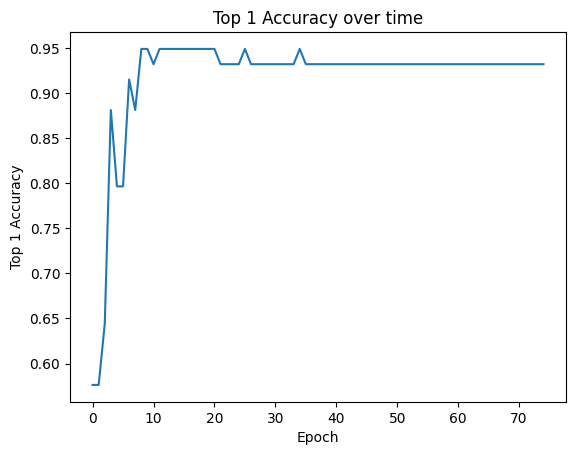

In [31]:
import matplotlib.pyplot as plt

plt.plot(result_train['  metrics/accuracy_top1'])

plt.title('Top 1 Accuracy over time')
plt.xlabel('Epoch')
plt.ylabel('Top 1 Accuracy')

plt.show()